In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/Users/guest/Dropbox/Education/Thinkful/Unit 2/l1/titanic_train.csv')

In [3]:
print(df.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

pd.set_option('display.max_columns', 100)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


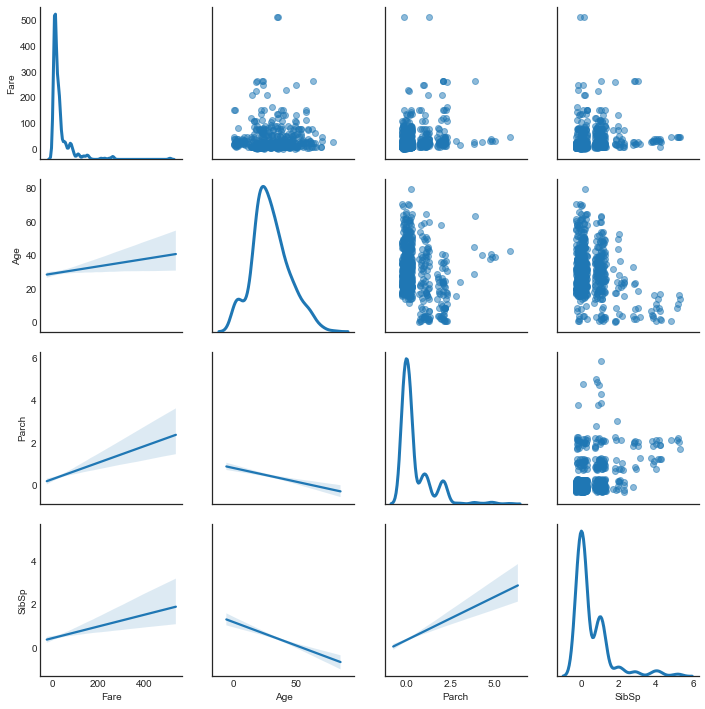

In [6]:
# Make a copy of the data to add jitter to and plot.
df_jittered = df[['Fare', 'Age', 'Parch', 'SibSp']].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

# Combine the jitter and the data
df_jittered = df_jittered + jitter

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

           Fare       Age     Parch     SibSp
Fare   1.000000  0.096067  0.216225  0.159651
Age    0.096067  1.000000 -0.189119 -0.308247
Parch  0.216225 -0.189119  1.000000  0.414838
SibSp  0.159651 -0.308247  0.414838  1.000000


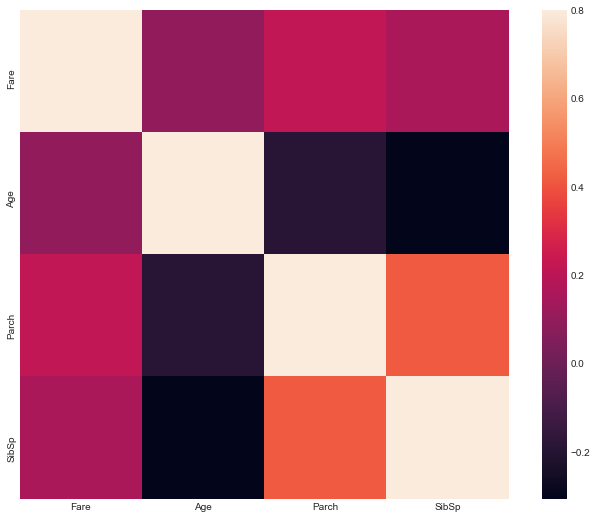

In [7]:
df_cont = df[['Fare', 'Age', 'Parch', 'SibSp']]

# Make the correlation matrix.
corrmat = df_cont.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

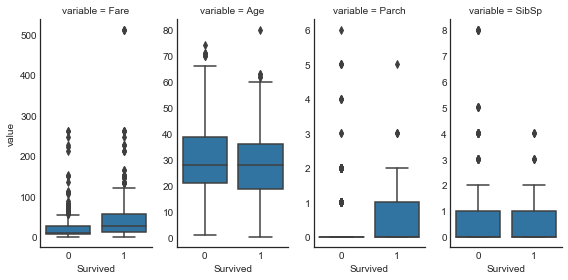

           Fare                                                          
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292
            Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
          Parch                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0
1         342.0  0.464912  0.771712  0.0  0.0 

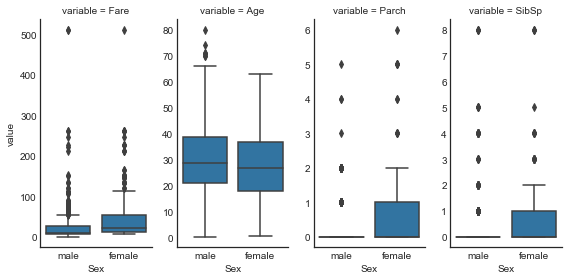

         Fare                                                              
        count       mean        std   min        25%   50%    75%       max
Sex                                                                        
female  314.0  44.479818  57.997698  6.75  12.071875  23.0  55.00  512.3292
male    577.0  25.523893  43.138263  0.00   7.895800  10.5  26.55  512.3292
          Age                                                    
        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0
        Parch                                             
        count      mean       std  min  25%  50%  75%  max
Sex                                                       
female  314.0  0.649682  1.022846  0.0  0.0  0.0  1.0  6.0
male    577.0  0.235702  0.612294  0.0  0.0  0.0  0.0 

In [8]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
def catcont(cat):
    df_long = df[['Fare', 'Age', 'Parch','SibSp',cat]]
    df_long = pd.melt(df_long, id_vars=[cat])

    g = sns.FacetGrid(df_long, col="variable", sharey=False, size=4, aspect=.5)
    g = g.map(sns.boxplot, cat, "value")
    plt.show()

    # Descriptive statistics by group.
    for var in df[['Fare', 'Age', 'Parch']].columns:
        print(df[[var, cat]].groupby(cat).describe())

    # Test whether group differences are significant.
    for col in df[['Fare', 'Age', 'Parch', cat]].columns:
        print(col)
        print(stats.ttest_ind(
                df[df[cat] == 0][col].dropna(),
                df[df[cat] == 1][col].dropna()
            ))

catcont('Survived')
catcont('Sex')

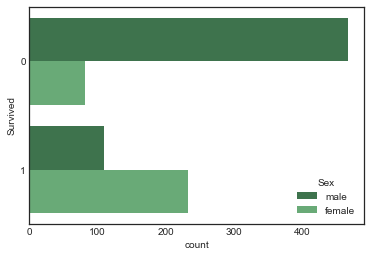

Sex       female  male
Survived              
0             81   468
1            233   109
Power_divergenceResult(statistic=418.7867564534231, pvalue=1.8861714255214322e-90)


In [9]:
# Add a second categorical variable.
df_2cat = df[['Survived', 'Sex']]

# Plot counts for each combination of levels.
sns.countplot(y="Survived", hue="Sex", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['Survived'], df_2cat['Sex'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

In [47]:
# Feature Engineering

features = df.loc[:,('Fare', 'Age', 'Parch', 'SibSp', 'Sex')]

# I think that sex is likely to impact survival, so I converted categorical sex to a binary variable
features['is_female'] = np.where(features['Sex'].dropna() == 'female', 1, 0)
features.drop('Sex', axis=1, inplace=True)

# I think that fare cost is worth drilling down to, so I've defined three binary variables that track high cost tickets
# (above median), very high cost tickets (above the 75th percentile), and passengers who didn't pay fare.
features['above_median_fare'] = np.where(features['Fare'] > np.median(features['Fare']), 1, 0)
features['above_75th_fare'] = np.where(features['Fare'] > np.percentile(features['Fare'], 75), 1, 0)
features['no_fare'] = np.where(features['Fare'].dropna()== 0, 1, 0)

# I think that overall family size is worth examining – does having a larger family have a positive impact on survival?
features['family_size'] = features['Parch'] + features['SibSp']

# I think that 
features['has_siblings'] = np.where(features['SibSp'] > 0, 1, 0)

# I think that being very young or very old will have a positive impact on survival.
# I classified children under 18 as children, children under 7 as young children, and children under 1 as infants.
features['is_child'] = np.where(features['Age'] < 18, 1, 0)
features['is_young_child'] = np.where(features['Age'] < 7, 1, 0)
features['is_infanthttp://localhost:8888/notebooks/Dropbox/Education/Thinkful/Unit%202/l1/u2l1s8.ipynb#'] = np.where(features['Age'] < 1, 1, 0)
features['is_elderly'] = np.where(features['Age'] > 65, 1, 0)

# Taking the natural log of fare to try to minimize the impact of outliers on the high end
features['fare_log'] = (features['Fare'].dropna() + 1).apply(np.log)